# Random Forest Classifier
In this tutorial, we are going to implement Random Forest algorithm using only built-in Python modules like numpy. </br>
The random forest algorithm is one of the most powerful and most popular
algorithms. It is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. </br>
<img src="https://i.ytimg.com/vi/goPiwckWE9M/maxresdefault.jpg" alt="random_forest">
Image credits - https://www.youtube.com/watch?v=goPiwckWE9M</br>
The above image shows the whole idea of Random Forest. The idea is to combine multiple trees into a forest so we train multiple trees and each tree gets a random subset of the training data thus the word random. We then make a prediction with each of the trees at the end and then we make a majority vote to
get the final prediction. </br>
The whole idea of the random forest has some advantages compared to only one
tree for example by building more trees we have more chances to get the correct
prediction and we also reduce the chance of overfitting with a single tree so
typically the accuracy of a random forest is higher than with a single tree
and that's why it's so powerful


In order to implement Random Forest Classifier, We will be using iris dataset which is available in scikit-learn library. For more information about dataset, please visit the documentation of scikit library [here](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html). 

Before implementing the algorithm, let us first explore the iris dataset.

In [1]:
import numpy as np
import pandas as pd
# Importing iris dataset from scikit learn library
from sklearn.datasets import load_iris
df = load_iris()

In [2]:
#Returns all the keys of the dataset dictionary
df.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
#Description of the dataset
print(df.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# Features of Dataset (Columns of Dataset)
print(df.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
# Converting dictionary to dataframe and Exploring first 5 rows of Dataset with the help of pandas library
iris = pd.DataFrame(df.data,columns = df.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# Adding a new column of target values to iris dataframe (class of iris flower)
iris['TARGET_VALUE'] = df.target
iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),TARGET_VALUE
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [7]:
# Checking if the dataset contains any null values or not.
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
TARGET_VALUE         0
dtype: int64

In [8]:
iris.value_counts("TARGET_VALUE")

TARGET_VALUE
2    50
1    50
0    50
dtype: int64

Here,</br>
<table>
  <tr>
    <th>TARGET_VALUE</th>
    <th>TARGET_NAME</th>
  </tr>
  <tr>
    <td> 2 </td>
    <td> Virginica </td>
  </tr>
  <tr>
    <td> 1 </td>
    <td> Versicolor </td>
  </tr>
  <tr>
    <td> 0 </td>
    <td> Setosa </td>
  </tr>
</table>


DATA VISUALIZATION

Text(0, 0.5, 'Targets')

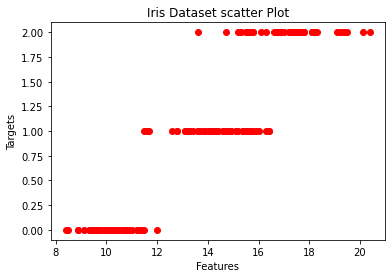

In [9]:
# Extract the values for features and create a list called featuresAll
featuresAll=[]
features = df.data[: , [0,1,2,3]]

# Extract the values for targets
targets = df.target
targets.reshape(targets.shape[0],-1)

# Every observation gets appended into the list once it is read. For loop is used for iteration process
for observation in features:
    featuresAll.append([observation[0] + observation[1] + observation[2] + observation[3]])

# Plotting the Scatter plot
import matplotlib.pyplot as plt
plt.scatter(featuresAll, targets, color='red', alpha =1.0)
plt.rcParams['figure.figsize'] = [10,8]
plt.title('Iris Dataset scatter Plot')
plt.xlabel('Features')
plt.ylabel('Targets')

Since Random Forest was built on top of Deccision Tree algorithm. 
The math behind Decision tree is summarised in the followin picture:
<img src="https://i.pinimg.com/originals/ac/10/0a/ac100a03e2d1ad9a1132b5b4939a41a1.png" alt="formula">
Let us first build Decision tree based on the formula shown above </br>
Image credits - https://www.pinterest.it/pin/326511041737648188/

Algorithm approached for building Decision Tree:
Train Algorithm := Build the tree
1.  Start at the top node and at each node select the best split based on the best information gain
2.   Greedy Search: Loop over all features and over all thresholds (all possible feature values)
3. Save the best split feature and split the threshold at each node.
4. Build the tree recursively
5. Applt some stopping criteria to stop growing
e.g. here: maximum depth, minimum samples at node, no more class distribution in node
5. when we have a leaf node, store the most common class label of this node 

Predict := Traverse tree
1.   Traverse the tree recursively.
2.   At each node look at the best split feature vector x and go left or right
depending on x[feature_idx] <= threshold
3. When we reach the leaf node we return the stored most common class label.

In [10]:
from collections import Counter

def entropy(y):
  #calculate number of occurences of all class labels
  hist = np.bincount(y)
  #probability
  ps = hist / len(y)
  #Formula for Entropy
  return -np.sum([p * np.log2(p) for p in ps if p > 0])


#Store the information of our Node
class Node:
  def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
    self.feature = feature
    self.threshold = threshold
    self.left = left
    self.right = right
    self.value = value

  #If we have a value, we are at leaf node, otherwise not
  def is_leaf_node(self):
    return self.value is not None

class DecisionTree:
  #We do greedy search over all the features
  def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
    self.min_samples_split = min_samples_split
    self.max_depth = max_depth
    self.n_feats = n_feats
    self.root = None

  #Fit Training data
  def fit(self, X, y):
    #Grow tree
    self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
    self.root = self._grow_tree(X, y)

  #Make predictions
  def predict(self, X):
    return np.array([self._traverse_tree(x, self.root) for x in X])

  def _grow_tree(self, X, y, depth=0):
    n_samples, n_features = X.shape
    n_labels = len(np.unique(y))

    # stopping criteria
    if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
      leaf_value = self._most_common_label(y)
      return Node(value=leaf_value)

    feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

    # greedily select the best split according to information gain
    best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

    # grow the children that result from the split
    left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
    left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
    right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
    # return new node in the middle
    return Node(best_feat, best_thresh, left, right)

  #To select best criteria to split the data further
  def _best_criteria(self, X, y, feat_idxs):
    best_gain = -1
    split_idx, split_thresh = None, None
    for feat_idx in feat_idxs:
      X_column = X[:, feat_idx]
      thresholds = np.unique(X_column)
      for threshold in thresholds:
        gain = self._information_gain(y, X_column, threshold)

        if gain > best_gain:
          best_gain = gain
          split_idx = feat_idx
          split_thresh = threshold

    return split_idx, split_thresh

  def _information_gain(self, y, X_column, split_thresh):
    # parent loss
    parent_entropy = entropy(y)

    # generate split
    left_idxs, right_idxs = self._split(X_column, split_thresh)

    if len(left_idxs) == 0 or len(right_idxs) == 0:
      return 0

    # compute the weighted avg. of the loss for the children
    n = len(y)
    n_l, n_r = len(left_idxs), len(right_idxs)
    e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
    child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

    # information gain is difference in loss before vs. after split
    ##########FORMULA FOR INFORMATION GAIN
    #IG = E(parent) - [weighted average] - E(children)
    ig = parent_entropy - child_entropy
    return ig

  def _split(self, X_column, split_thresh):
    left_idxs = np.argwhere(X_column <= split_thresh).flatten()
    right_idxs = np.argwhere(X_column > split_thresh).flatten()
    return left_idxs, right_idxs

  def _traverse_tree(self, x, node):
    if node.is_leaf_node():
      return node.value

    if x[node.feature] <= node.threshold:
      #left Tree
      return self._traverse_tree(x, node.left)
    #Right Tree
    return self._traverse_tree(x, node.right)

  def _most_common_label(self, y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common



Building Random Forest Algorithm with the help of Decision tree algorithm implemented above:

In [11]:
#To give our tree random subset
def bootstrap_sample(X, y):
  n_samples = X.shape[0]
  idxs = np.random.choice(n_samples, n_samples, replace=True)
  return X[idxs], y[idxs]

def most_common_label(y):
  counter = Counter(y)
  most_common = counter.most_common(1)[0][0]
  return most_common

class RandomForest:
  def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, n_feats=None):
    self.n_trees = n_trees
    self.min_samples_split = min_samples_split
    self.max_depth = max_depth
    self.n_feats = n_feats
    #To store each single tree that we create 
    self.trees = []
  
  #For fitting training data
  def fit(self, X, y):
    self.trees = []
    for _ in range(self.n_trees):
      tree = DecisionTree(min_samples_split=self.min_samples_split,max_depth=self.max_depth,n_feats=self.n_feats,)
      X_samp, y_samp = bootstrap_sample(X, y)
      tree.fit(X_samp, y_samp)
      self.trees.append(tree)

  #For predictions
  def predict(self, X):
    tree_preds = np.array([tree.predict(X) for tree in self.trees])
    tree_preds = np.swapaxes(tree_preds, 0, 1)
    # To perform majority voting
    y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
    return np.array(y_pred)

Finally Fitting iris data set and making predictions using the Random Forest Algorithm that we have implemented without using any standard ML library like scikit-learn.

In [14]:
if __name__ == "__main__":
    # Imports
    from sklearn.model_selection import train_test_split

    #To calculate accuracy predicted by our model
    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    X = df.data
    y = df.target

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

    clf = RandomForest(n_trees=3, max_depth=10)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy(y_test, y_pred)

    print("Accuracy obtained from Random Forest Classifier is:", acc)

Accuracy obtained from Random Forest Classifier is: 0.9666666666666667


References:
1. https://youtu.be/Oq1cKjR8hNo
2. https://www.kaggle.com/lalitharajesh/iris-dataset-exploratory-data-analysis

Contributor</br>
ID : 992</br>
ML BATCH : 6</br>
[@NikitaEmberi](https://github.com/NikitaEmberi)